# 读取CIFAR10图像

## 异或操作

In [1]:
import math
import numpy as np

# x = x XOR xorstring
def getXORImg(image_org,xorstring,flag =0):
    # print("===================xor,xor,xor,xor,xor,xor,xor,xor,xor,xor==========================")
    # print(xorstring)
    image = image_org.copy()
  
    #异或串长度
    lenth = len(xorstring)
    
    if flag == 1:
        print("before xor:")
        for i in range(32):
            for j in range(32):
                print(image[i][j][0],end=" ")
            print()
    
    # print("===================xor,xor,xor,xor,xor,xor,xor,xor,xor,xor==========================")
    index = 0
    for k in range(3):
        for i in range(32):
            for j in range(32):
                xorV = image[i][j][k] ^ xorstring[index]
                if flag == 1 and j == 0:
                    print(xorstring)
                    print("{} and {} xor = {}".format(image[i][j][0],xorstring[index],xorV))
                index = index+1
                if index == lenth:
                    index = 0
                image[i][j][k] = xorV

    if flag == 1: 
        print("after xor:")
        for i in range(32):
            for j in range(32):
                print(image[i][j][0],end=" ")
            print()

    return image

In [2]:
def psnr(img1, img2):
    """
    PSMR计算函数
    """
    mse = np.mean( (img1/255. - img2/255.) ** 2 )
    if mse < 1.0e-10:
        return 100
    PIXEL_MAX = 1
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def psnr2(img1, img2):
   mse = np.mean((img1/1.0 - img2/1.0) ** 2 )
   if mse < 1.0e-10:
      return 100
   return 10 * math.log10(255.0**2/mse)

In [3]:
import numpy as np
from PIL import Image 
from scipy.signal import convolve2d
 
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h
 
def filter2(x, kernel, mode='same'):
    return convolve2d(x, np.rot90(kernel, 2), mode=mode)
 
def compute_ssim(im1, im2, k1=0.01, k2=0.03, win_size=11, L=255):
 
    if not im1.shape == im2.shape:
        raise ValueError("Input Imagees must have the same dimensions")
    if len(im1.shape) > 2:
        raise ValueError("Please input the images with 1 channel")
 
    M, N = im1.shape
    C1 = (k1*L)**2
    C2 = (k2*L)**2
    window = matlab_style_gauss2D(shape=(win_size,win_size), sigma=1.5)
    window = window/np.sum(np.sum(window))
 
    if im1.dtype == np.uint8:
        im1 = np.double(im1)
    if im2.dtype == np.uint8:
        im2 = np.double(im2)
 
    mu1 = filter2(im1, window, 'valid')
    mu2 = filter2(im2, window, 'valid')
    mu1_sq = mu1 * mu1
    mu2_sq = mu2 * mu2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = filter2(im1*im1, window, 'valid') - mu1_sq
    sigma2_sq = filter2(im2*im2, window, 'valid') - mu2_sq
    sigmal2 = filter2(im1*im2, window, 'valid') - mu1_mu2
 
    ssim_map = ((2*mu1_mu2+C1) * (2*sigmal2+C2)) / ((mu1_sq+mu2_sq+C1) * (sigma1_sq+sigma2_sq+C2))
 
    return np.mean(np.mean(ssim_map))

In [4]:
import cv2
import numpy as np
def ssim(img1, img2):
  C1 = (0.01 * 255)**2
  C2 = (0.03 * 255)**2
  img1 = img1.astype(np.float64)
  img2 = img2.astype(np.float64)
  kernel = cv2.getGaussianKernel(11, 1.5)
  window = np.outer(kernel, kernel.transpose())
  mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5] # valid
  mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
  mu1_sq = mu1**2
  mu2_sq = mu2**2
  mu1_mu2 = mu1 * mu2
  sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
  sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
  sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2
  ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                              (sigma1_sq + sigma2_sq + C2))
  return ssim_map.mean()

In [ ]:
def printImg(image,maxlen = 3072):
    for i in range(32):
        for j in range(32):
            if i*32 + j > maxlen:
                break
            print("%d "%image[i][j][0], end='')
    print()

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def image_grid(image,row,col,i,IsClip = [0,255],save = ""):
    #表示第i张图片，下标只能从1开始，不能从0，
    plt.subplot(row,col,i)
    
    plt.imshow(np.clip(np.array(image),IsClip[0],IsClip[1]),cmap=plt.cm.gray)
 
    #下面两行是消除每张图片自己单独的横纵坐标，不然每张图片会有单独的横纵坐标，影响美观
    plt.xticks([])
    plt.yticks([])

    if save!="":
        plt.savefig(save, dpi=300,bbox_inches='tight')

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


In [8]:

import tarfile
import numpy as np
import six
from PIL import Image
from six.moves import cPickle as pickle

import paddle
from paddle.io import Dataset

CUDA = True
if CUDA:
    paddle.set_device('gpu')
place = paddle.CUDAPlace(0) if CUDA else paddle.CPUPlace()

class MyCifar10(Dataset):

    def __init__(self,
                 data = None,
                 transform=None):
      
        self.data = data
        self.transform = transform

        self.dtype = paddle.get_default_dtype()

    def __getitem__(self, idx):
        image, label = self.data[idx]
        
        if self.transform is not None:
            image = self.transform(image)

        return image.astype(self.dtype), np.array(label).astype('int64')

    def __len__(self):
        return len(self.data)

MODE_FLAG_MAP = {
    'train10': 'data_batch',
    'test10': 'test_batch',
    'train100': 'train',
    'test100': 'test'
}

class XORCifar10(Dataset):

    def __init__(self,
                 data_file=None,
                 mode='train',
                 group = 5,
                 xor_num = 4,
                 xor_len = 28,
                 transform = None):
        assert mode.lower() in ['train', 'test', 'train', 'test'], \
            "mode should be 'train10', 'test10', 'train100' or 'test100', but got {}".format(mode)
        self.mode = mode.lower()

        
        #自定义属性
        self.group = group
        self.xor_num = xor_num
        self.xor_len = xor_len
  
        self.transform = transform

        self._init_flag()

        self.data_file = data_file

        self._getXORstring()

        # read dataset into memory
        self._load_data()
        
        self._getLoader()

    def _init_flag(self):
        self.flag = MODE_FLAG_MAP[self.mode + '10']

    def _load_data(self):
        self.data = []
        with tarfile.open(self.data_file, mode='r') as f:
            names = (each_item.name for each_item in f
                     if self.flag in each_item.name)

            names = sorted(list(names))

            for name in names:
                batch = pickle.load(f.extractfile(name), encoding='bytes')

                data = batch[six.b('data')]
                labels = batch.get(
                    six.b('labels'), batch.get(six.b('fine_labels'), None))
                assert labels is not None
                # 得到一个文件里的所有数据，train有5个文件，test有一个文件
                for sample, label in six.moves.zip(data, labels):
                    self.data.append((sample, label))
        
        np.random.seed(1313)
        np.random.shuffle(self.data)

        self._groupXORData()
        print(len(self.data))
    
    def _getXORstring(self):
        self.xorstring = []
        seeds = [33,133,233,1333,2333,333,433,533,633,733,833,933]
        count = 0
        for k in range(self.group):
            xorArray = []
            myseed = seeds[count]
            count = count+1
            for ttt in range(self.xor_num):
                np.random.seed(myseed)
                myseed = myseed + 2
                xorArray.append(np.random.randint(0,255,size = self.xor_len))
            #     print(xorArray[ttt])
            # print("one's xor string")
            self.xorstring.append(xorArray)

    def _groupXORData(self):
        lenth = len(self.data)
        block = lenth // self.group
        
        self.userData = []
        uu = 0
        temp_index = 0
        for k in range(0,lenth-1, block):
            if uu >= self.group:
                break
            one = self.data[k:k+block]
            xorImg = []

            for index in range(len(one)):
                # if index > 100:
                #     break
                img = np.reshape(one[index][0], [3, 32, 32])
                img = img.transpose([1, 2, 0])
                # # 使用哪一个用户的哪一条异或串
                # print("===================================================================")
                # printImg(img,30)
                # print("使用的异或串是"+str(self.xorstring[uu][index % self.xor_num]))
                xor_img = getXORImg(img,self.xorstring[uu][index % self.xor_num])   
                # printImg(img,30)
                # print("===================================================================")
                xorImg.append((xor_img,one[index][1]))
                image_grid(img,1,1,1,save= str(temp_index))
                plt.show()
                image_grid(xor_img,1,1,1,save=str(temp_index)+"xor")
                temp_index = temp_index + 1
                plt.show()
                # for cc in range(3):
                #     imgt = img[:,:,cc]
                #     xor_imgt = xor_img[:,:,cc]
                #     print(imgt.shape)
                #     print(xor_imgt.shape)
                #     print("psnr===================pesr=======================")
                #     print(psnr(imgt,xor_imgt))
                #     print(psnr2(imgt,xor_imgt))

                #     # print(img)
                #     # print(xor_img)

                #     print("ssim===================ssim=======================")
                #     print(compute_ssim(imgt,xor_imgt))
                #     print(ssim(imgt,xor_imgt))
                
                break
                if index >= 10 :
                    break

            uu = uu + 1
            self.userData.append(xorImg)
            print(len(one))
 
    def _getLoader(self):
        self.loader = []
        for i in range(self.group):
            # print("使用的数据集是。。。。。。。。。。。。。。。。。。。。。。。")
            # for kkk in range(10):
                # printImg(self.userData[i][kkk][0],30)
                # print("==============================")
            sub_dataset = MyCifar10(self.userData[i], self.transform)

            temp = paddle.io.DataLoader(sub_dataset, places=place,batch_size=128, shuffle=True,
    num_workers=0, use_shared_memory=True)

            self.loader.append(temp)



## 加载异或图像

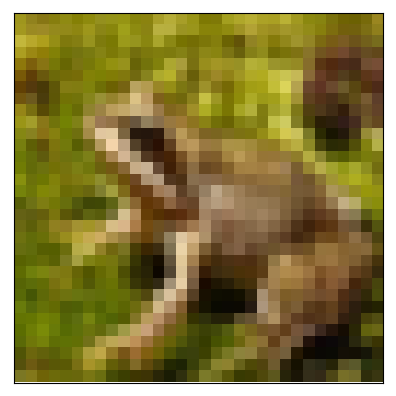

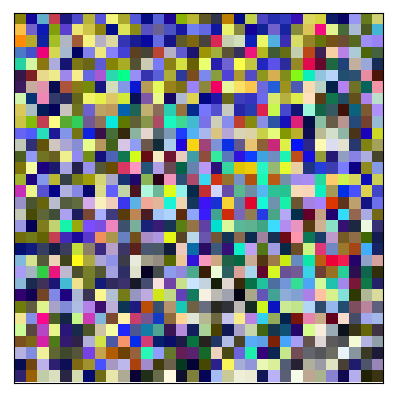

2000


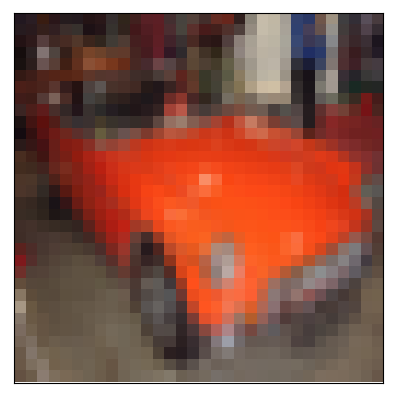

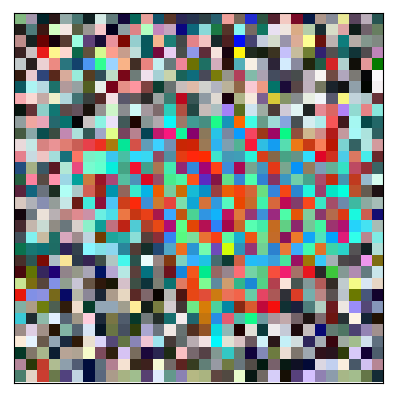

2000


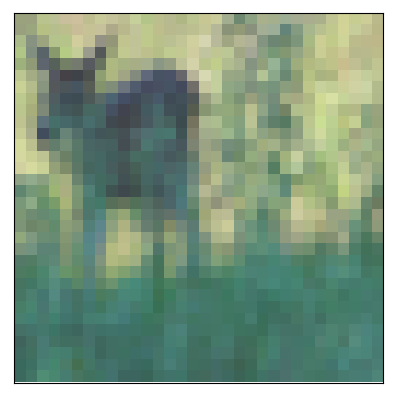

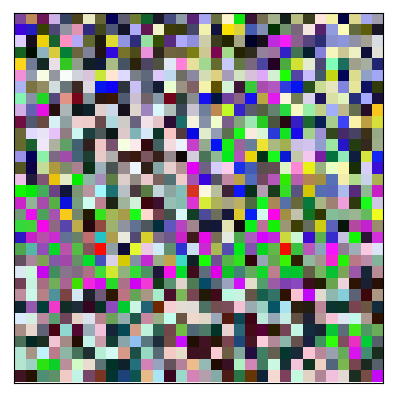

2000


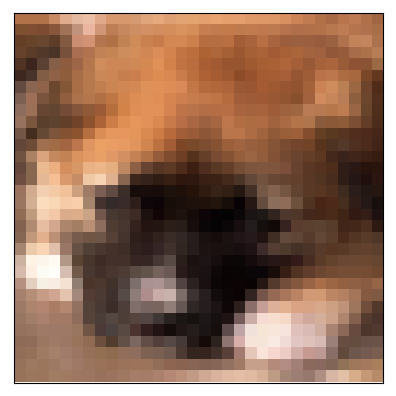

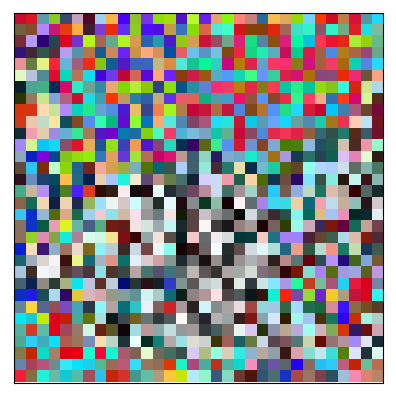

2000


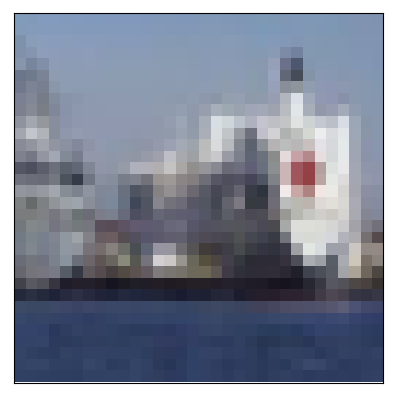

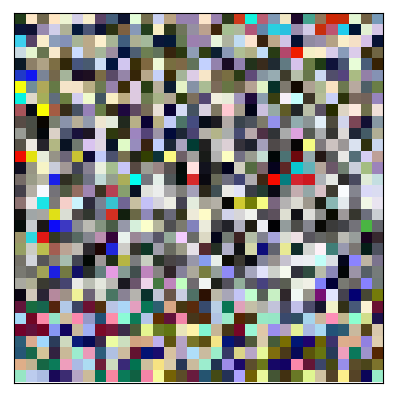

2000
10000


In [9]:
from paddle.vision import transforms

mean,std = ([0.4914, 0.4822, 0.4465],[0.2023, 0.1994, 0.2010])
mean = list(map(lambda x:x*255,mean))
std = list(map(lambda x:x*255,std))

# transform=transforms.Compose([
#         # transforms.Resize(size=64),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomCrop(32, 4),
#         transforms.Transpose(order=(2,0,1)),
#         transforms.Normalize(mean=mean,std=std),
#     ])
# myobj = XORCifar10(mode='train',group = 5,xor_num = 10,xor_len = 20,data_file ="data/data46154/cifar-10.tar.gz",transform = transform)
# tran_loader = myobj.loader

transform=transforms.Compose([
        transforms.Transpose(order=(2,0,1)),
        transforms.Normalize(mean=mean,std=std),
    ])
myobj = XORCifar10(mode='test',group = 5,xor_num = 1,xor_len = 1024,data_file ="data/data46154/cifar-10.tar.gz",transform = transform)
val_loader = myobj.loader

In [ ]:
myobj = XORCifar10(mode='test',group = 1,xor_num = 50000,xor_len = 30,data_file ="data/data46154/cifar-10.tar.gz",transform = transform)
val_loader = myobj.loader

KeyboardInterrupt: 

In [ ]:
myobj = XORCifar10(mode='test',group = 1,xor_num = 50000,xor_len = 30,data_file ="data/data46154/cifar-10.tar.gz",transform = transform)

159 145 135 135 143 133 142 148 149 150 135 139 168 182 167 153 126 127 163 175 184 172 170 186 161 139 135 122 111 108 119 
使用的异或串是[ 20 135 216  66 146 201  57 195 102  61 211 142 252 170  45  35  33  77
  31 172 122 231 140 139 150  80  80 106 102 246]
139 22 95 197 29 76 183 87 243 171 84 5 84 28 138 186 95 50 188 3 194 75 38 49 55 219 215 16 9 154 99 
141 76 74 81 85 83 75 74 72 65 53 50 52 54 54 57 62 70 75 76 73 78 76 69 66 63 62 63 63 68 71 
使用的异或串是[201  15 236 183  33 236 191 192 249 232 139 139 184 200  57 183 222 172
 126 219  55  56 192 233  76 189 242 111 149 131]
68 67 166 230 116 191 244 138 177 169 190 185 140 254 15 142 224 234 53 151 126 118 140 172 14 130 204 80 170 199 142 
14 6 7 20 35 35 18 9 17 33 86 113 81 31 23 17 13 8 9 24 35 44 48 21 7 4 3 3 5 12 34 
使用的异或串是[143 107  76 251 220 181  22 122 163 195  42  85  63  88 245 215 223  62
   8 232 131 178  76 216  46 140  90  17  88  26]
129 109 75 239 255 150 4 115 178 226 124 36 110 71 226 198 210 54 1 240 160 158 124

In [ ]:
test_loader = myobj.loader

In [ ]:
import matplotlib.pyplot as plt

for user in test_loader:
    for batch_id, data in enumerate(user()):
        x_data = data[0]
        y_data = data[1]

        printImg(x_data.numpy()[batch_id].transpose(1,2,0))
        # print(x_data[0].shape)


        break
        # for i in range(5):
        #     # print(x_data.numpy()[i].shape)
        #     plt.subplot(1,3,1)
        #     plt.title(y_data.numpy()[i])
        #     plt.imshow(x_data.numpy()[i].transpose(1,2,0),cmap=plt.cm.gray)
            
        #     plt.subplot(1,3,2)
        #     plt.title(y_data.numpy()[i+1])
        #     plt.imshow(x_data.numpy()[i+1].transpose(1,2,0),cmap=plt.cm.gray)

        #     plt.subplot(1,3,3)
        #     plt.title(y_data.numpy()[i+2])
        #     plt.imshow(x_data.numpy()[i+2].transpose(1,2,0),cmap=plt.cm.gray)
        
        #     #下面两行是消除每张图片自己单独的横纵坐标，不然每张图片会有单独的横纵坐标，影响美观
        #     # plt.xticks([])
        #     # plt.yticks([])
        #     plt.show()
        # break

-1 -2 1 -1 -1 -1 1 0 1 1 2 0 0 -2 1 -1 1 0 -2 2 0 0 -1 -1 -1 0 1 0 0 -1 0 -1 1 0 -1 -1 1 0 0 1 2 0 0 -2 1 -1 -1 0 -2 1 0 0 -1 1 -1 0 -1 0 0 -1 0 1 -1 0 -2 -2 2 1 0 1 2 0 0 -2 1 0 -1 0 2 -2 0 0 1 -1 1 0 0 0 0 -1 0 -1 1 1 1 -1 2 0 0 2 1 0 0 -1 2 0 0 0 2 -2 0 0 1 -1 -1 0 -1 0 0 1 0 -1 1 -1 -1 -1 1 0 -2 0 0 -1 0 -1 2 0 0 0 -2 2 0 0 2 -2 1 0 1 0 0 -1 0 1 -1 1 1 1 1 0 0 1 0 -1 -1 -1 1 0 0 0 1 -1 1 0 -1 2 -2 1 0 0 0 -1 0 2 -2 0 1 1 -1 0 0 -1 1 0 -2 0 0 -1 -2 0 1 -1 0 0 -1 1 -2 0 0 0 0 -1 0 -1 -1 0 1 1 -1 0 0 -1 -1 0 0 -2 1 -1 -1 1 0 0 -1 0 -2 2 -1 0 0 0 0 -1 0 -1 1 0 1 1 -1 0 1 -1 0 0 1 2 1 -1 -1 1 0 0 -1 -1 1 -1 -2 0 0 0 1 2 0 -2 -1 0 1 1 -1 0 0 -1 0 1 0 2 -1 0 0 0 0 -1 -1 -1 0 -2 1 0 0 0 0 -1 0 1 -1 1 1 -1 -1 0 1 1 -1 1 1 1 -2 2 0 0 2 -1 -1 -1 1 -2 2 0 0 0 0 1 0 2 -2 0 1 1 1 0 0 1 2 0 1 1 0 1 1 0 2 -2 0 0 1 -1 1 0 0 0 0 1 1 1 -2 0 2 2 -2 0 1 -1 -2 0 0 1 -1 2 2 -2 -1 -1 0 0 2 -1 2 0 0 1 0 1 0 2 -1 0 2 1 0 -1 0 -2 -2 0 0 1 0 0 2 -1 -1 0 0 0 2 -1 1 0 0 0 0 -1 0 1 -1 0 1 2 -2 -1 0 -1 2 0 0 1 -1

# 组网

In [25]:
import paddle.nn.functional as F

class MyNet(paddle.nn.Layer):
    def __init__(self, num_classes=1):
        super(MyNet, self).__init__()

        self.conv1 = paddle.nn.Conv2D(in_channels=3, out_channels=32, kernel_size=(3, 3))
        self.pool1 = paddle.nn.MaxPool2D(kernel_size=2, stride=2)

        self.conv2 = paddle.nn.Conv2D(in_channels=32, out_channels=64, kernel_size=(3,3))
        self.pool2 = paddle.nn.MaxPool2D(kernel_size=2, stride=2)

        self.conv3 = paddle.nn.Conv2D(in_channels=64, out_channels=64, kernel_size=(3,3))

        self.flatten = paddle.nn.Flatten()

        self.linear1 = paddle.nn.Linear(in_features=1024, out_features=64)
        self.linear2 = paddle.nn.Linear(in_features=64, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = F.relu(x)

        x = self.flatten(x)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

# model = MyNet(10)
# # model = paddle.Model(model)
# params_info = paddle.summary(model, (1, 3, 32, 32))
# print(params_info)

In [4]:
import math
import paddle
import paddle.nn as nn
import paddle.nn.functional as F


class BasicBlock(nn.Layer):
    def __init__(self, in_planes, out_planes, stride, dropRate=0.0):
        super(BasicBlock, self).__init__()
        self.bn1 = nn.BatchNorm2D(in_planes)
        self.relu1 = nn.ReLU()
        self.conv1 = nn.Conv2D(in_planes, out_planes, kernel_size=3, stride=stride,
                               padding=1, weight_attr=nn.initializer.KaimingNormal())
        self.bn2 = nn.BatchNorm2D(out_planes)
        self.relu2 = nn.ReLU()
        self.conv2 = nn.Conv2D(out_planes, out_planes, kernel_size=3, stride=1,
                               padding=1, weight_attr=nn.initializer.KaimingNormal())
        self.droprate = dropRate
        self.equalInOut = (in_planes == out_planes)
        self.convShortcut = (not self.equalInOut) and nn.Conv2D(in_planes, out_planes, kernel_size=1, stride=stride,
                               padding=0, weight_attr=nn.initializer.KaimingNormal()) or None
    def forward(self, x):
        out = None
        if not self.equalInOut:
            x = self.relu1(self.bn1(x))
        else:
            out = self.relu1(self.bn1(x))
        out = self.relu2(self.bn2(self.conv1(out if self.equalInOut else x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, training=self.training)
        out = self.conv2(out)
        return paddle.add(x if self.equalInOut else self.convShortcut(x), out)

class NetworkBlock(nn.Layer):
    def __init__(self, nb_layers, in_planes, out_planes, block, stride, dropRate=0.0):
        super(NetworkBlock, self).__init__()
        self.layer = self._make_layer(block, in_planes, out_planes, nb_layers, stride, dropRate)
    def _make_layer(self, block, in_planes, out_planes, nb_layers, stride, dropRate):
        layers = []
        for i in range(int(nb_layers)):
            layers.append(block(i == 0 and in_planes or out_planes, out_planes, i == 0 and stride or 1, dropRate))
        return nn.Sequential(*layers)
    def forward(self, x):
        return self.layer(x)

class WideResNet(nn.Layer):
    def __init__(self, depth, num_classes, widen_factor=1, dropRate=0.0):
        super(WideResNet, self).__init__()
        nChannels = [16, 16*widen_factor, 32*widen_factor, 64*widen_factor]
        assert((depth - 4) % 6 == 0)
        n = (depth - 4) / 6
        block = BasicBlock
        # 1st conv before any network block
        self.conv1 = nn.Conv2D(3, nChannels[0], kernel_size=3, stride=1,
                               padding=1, weight_attr=nn.initializer.KaimingNormal())
        # 1st block
        self.block1 = NetworkBlock(n, nChannels[0], nChannels[1], block, 1, dropRate)
        # 2nd block
        self.block2 = NetworkBlock(n, nChannels[1], nChannels[2], block, 2, dropRate)
        # 3rd block
        self.block3 = NetworkBlock(n, nChannels[2], nChannels[3], block, 2, dropRate)
        # global average pooling and classifier
        self.bn1 = nn.BatchNorm2D(nChannels[3])
        self.relu = nn.ReLU()
        self.fc = nn.Linear(nChannels[3], num_classes)
        self.nChannels = nChannels[3]

        # for m in self.modules():
        #     if isinstance(m, nn.Conv2D):
        #         nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        #     elif isinstance(m, nn.BatchNorm2D):
        #         m.weight.data.fill_(1)
        #         m.bias.data.zero_()
        #     elif isinstance(m, nn.Linear):
        #         m.bias.data.zero_()
    def forward(self, x):
        out = self.conv1(x)
        out = self.block1(out)
        out = self.block2(out)
        out = self.block3(out)
        out = self.relu(self.bn1(out))
        out = F.avg_pool2d(out, 8)
        out = paddle.reshape(out,shape = (-1,self.nChannels))
        # out = out.view(-1, self.nChannels)
        return self.fc(out)



# if __name__ == '__main__':
#     m = WideResNet(28,10,20,0.3)
#     print(m)
#     y = m(paddle.randn(shape = (1, 3, 32, 32)))

#     print(y.shape)

# 训练

In [5]:
import paddle
import os
import numpy as np

import paddle.fluid as fluid
from paddle.fluid.dygraph import to_variable, save_dygraph

def co_train(nums = 10,epoch_num = 1000,use_gpu = True, load_model = True,dataSet="MNIST",meath="Mosaic",modelName="MLP"):

    place = paddle.CUDAPlace(0) if use_gpu else paddle.CPUPlace()
    with fluid.dygraph.guard(place):
        # 实例化模型
        if modelName=="LeNet":
            model = MyNet(num_classes=10)
        elif modelName=="ResNet50":
            model = ResNet(BottleneckBlock, 50 ,num_classes=10)
            # model = vgg19(num_classes=10)
        elif modelName=="WideResNet":
            model = WideResNet(28,10,20,0.3)

        # 配置优化器
        # scheduler = paddle.optimizer.lr.CosineAnnealingDecay(learning_rate=0.1, T_max=50, verbose=True)
        # opt = paddle.optimizer.SGD(learning_rate=scheduler, parameters=model.parameters())
        # opt = paddle.optimizer.Adam(learning_rate=0.001,parameters=model.parameters())
        
        scheduler=paddle.optimizer.lr.PiecewiseDecay(boundaries=[20,40,60,100,150],values=[0.05,0.01,0.002,0.001,0.0002],verbose=True)
        
        # scheduler=paddle.optimizer.lr.PiecewiseDecay(boundaries=[60,120,160,200,240,260,280],values=[0.05,0.01,0.002,0.0004,0.0002,0.0001,0.00005],verbose=True)
        opt = paddle.optimizer.Momentum(parameters=model.parameters(), learning_rate=scheduler, momentum=0.9,weight_decay=0.0005)

        
        # 多级目录
        savePath = os.path.join(dataSet+"_"+modelName,meath)
        if load_model and os.path.exists(savePath):
            
            model_para, model_opt = fluid.load_dygraph("CIFAR10_WideResNet/Xor1_50_20/"+modelName)

            # model_para, model_opt = fluid.load_dygraph(savePath+"/"+modelName)

            model.load_dict(model_para)
            # opt.set_dict(model_opt)
        
        if not os.path.exists(savePath):
            os.makedirs(savePath)

        # 模型训练
        model.train()
        print('Start training...')

        # 协作训练nums次
        best_acc=50
        losses = []

        for num in range(nums):
            # 用户i
            mycount = 0
            for user in tran_loader:
                print("==============================")
                if mycount >= 1:
                    break
                mycount = mycount + 1
                # 用户i迭代epoch次
                for epoch in range(epoch_num):
                    # 用户i的数据
                    for batch_idx, (x,y) in enumerate(user()):
                        
                        y = paddle.reshape(y, (-1, 1))

                        loss_fn = paddle.nn.CrossEntropyLoss()
                        loss = loss_fn(model(x), y)
                        acc_fn = paddle.metric.accuracy

                        loss.backward()
                        opt.step()
                        opt.clear_grad()

                        losses.append(np.mean(loss.numpy()))

                        if batch_idx % 500 == 0:
                            print("num: {}, epoch: {}, loss is: {}".format(num, epoch, np.mean(losses)))

            if (num+1) % 5 ==0:
                accuracies = []
                losses = []
                for (x,y) in val_loader[0]:
                    with paddle.no_grad():
                        logits = model(x)
                        y = paddle.reshape(y, (-1, 1))
                        loss = loss_fn(logits, y)
                        acc = acc_fn(logits, y)
                        accuracies.append(np.mean(acc.numpy()))
                        losses.append(np.mean(loss.numpy()))
                eval_acc = np.mean(accuracies)*100
                eval_loss = np.mean(losses) 
                print("Validation accuracy/loss: %.2f%%,%.4f"%(eval_acc, eval_loss))

                model.train()
                
                if eval_acc > best_acc:

                    best_acc = eval_acc
                    
                    save_dygraph(model.state_dict(),os.path.join(savePath,modelName))
                    # save_dygraph(opt.state_dict(),os.path.join(savePath,saveName))

            scheduler.step()

        # 模型保存
        # save_dygraph(opt.state_dict(), os.path.join(savePath,modelName))
        save_dygraph(model.state_dict(),os.path.join(savePath,modelName))
        # paddle.save(model.state_dict(),os.path.join(save_dir, 'model.pdparams'))
        # paddle.save(opt.state_dict(),os.path.join(save_dir, 'model.pdopt'))         
        print('Best accuracy on validation dataset: %.2f%%'%(best_acc))


import warnings

warnings.filterwarnings("ignore", category=Warning)


In [11]:
co_train(nums = 200,epoch_num = 1,load_model = True,dataSet="CIFAR10",meath="Xor5_1_10_20",modelName="WideResNet")

W0102 23:30:50.185583   190 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W0102 23:30:50.189538   190 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.


Epoch 0: PiecewiseDecay set learning rate to 0.05.
Start training...
num: 0, epoch: 0, loss is: 2.4014248847961426


In [ ]:
co_train(nums = 400,epoch_num = 1,load_model = True,dataSet="CIFAR10",meath="Xor1_2000_40",modelName="WideResNet")

W1112 11:29:25.981899   145 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W1112 11:29:25.986095   145 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.


Epoch 0: PiecewiseDecay set learning rate to 0.05.
Start training...
num: 0, epoch: 0, loss is: 0.8758476972579956
Epoch 1: PiecewiseDecay set learning rate to 0.05.
num: 1, epoch: 0, loss is: 0.9356421828269958
Epoch 2: PiecewiseDecay set learning rate to 0.05.
num: 2, epoch: 0, loss is: 0.9087651371955872
Epoch 3: PiecewiseDecay set learning rate to 0.05.
num: 3, epoch: 0, loss is: 0.8865997791290283
Epoch 4: PiecewiseDecay set learning rate to 0.05.
num: 4, epoch: 0, loss is: 0.8658688068389893
Validation accuracy/loss: 70.07%,0.8582
Epoch 5: PiecewiseDecay set learning rate to 0.05.
num: 5, epoch: 0, loss is: 0.8562664985656738
Epoch 6: PiecewiseDecay set learning rate to 0.05.
num: 6, epoch: 0, loss is: 0.7629461884498596
Epoch 7: PiecewiseDecay set learning rate to 0.05.
num: 7, epoch: 0, loss is: 0.7469596862792969
Epoch 8: PiecewiseDecay set learning rate to 0.05.
num: 8, epoch: 0, loss is: 0.7337954044342041
Epoch 9: PiecewiseDecay set learning rate to 0.05.
num: 9, epoch: 0, 

KeyboardInterrupt: 

# 评估

In [12]:
import os, cv2
import paddle.nn.functional as F
import numpy as np

def co_test(load_model = True,dataSet="MNIST",meath="Mosaic",modelName="MLP"):
    # 实例化模型
    if modelName=="LeNet":
        model = MyNet(num_classes=10)
    elif modelName=="ResNet50":
        model = ResNet(BottleneckBlock, 50 ,num_classes=10)
        # model = vgg19(num_classes=10)
    elif modelName=="WideResNet":
        model = WideResNet(28,10,20,0.3)

    # 多级目录
    savePath = os.path.join(dataSet+"_"+modelName,meath)
    if load_model and os.path.exists(savePath):
        model_para = paddle.load(savePath+"/"+modelName+".pdparams")
        model.set_state_dict(model_para)
    
    # 模型训练
    model.eval()
    print('Start testing...')

    # 用户i
    uu = 0
    for user in val_loader:
        uu = uu+1
        acc = []
        loss = []
        # 用户i的数据
        for batch_idx, (x,y) in enumerate(user()):
            y = paddle.reshape(y, (-1, 1))

            loss_fn = paddle.nn.CrossEntropyLoss()
            pre = model(x)
            avg_loss = loss_fn(pre, y)
            loss.append(avg_loss.numpy())
            cur_acc = paddle.metric.accuracy(pre, y)
            acc.append(cur_acc.numpy())  
        print("user: {}, loss is: {}, acc is: {}".format(uu, np.mean(loss), np.mean(acc)))

In [21]:
transform=transforms.Compose([
        transforms.Transpose(order=(2,0,1)),
        transforms.Normalize(mean=mean,std=std),
    ])
myobj = XORCifar10(mode='test',group = 1,xor_num = 2000,xor_len = 60,data_file ="data/data46154/cifar-10.tar.gz",transform = transform)
val_loader = myobj.loader

10000
10000


In [22]:
def test(meath = 'Xor3_4_20'):
    model=WideResNet(28,10,20,0.3)
    checkpoint=paddle.load('CIFAR10_WideResNet/'+meath+'/WideResNet.pdparams')
    model.set_state_dict(checkpoint)
    loss_fn = paddle.nn.CrossEntropyLoss()
    acc_fn = paddle.metric.accuracy
    accuracies=[]
    losses=[]
    model.eval()

    for user in val_loader:
        total = 0
        acc = 0
        for (x,y) in user:
            with paddle.no_grad():
                logits=model(x)
                y=paddle.reshape(y,(-1,1))
                loss=loss_fn(logits,y)
                logits = logits.numpy()
                y = y.numpy()
                total += len(logits)
                for index,item in enumerate(logits):
                    label = np.argmax(item)
                    if label == y[index][0]:
                        acc += 1

        print("acc:{} total:{} ratio:{}".format(acc,total,acc*1.0/total))

In [23]:
test("Xor1_2000_60")

acc:7933 total:10000 ratio:0.7933


In [20]:
test("Xor1_2000_40")

acc:8331 total:10000 ratio:0.8331


In [17]:
test("Xor1_20000_20")

acc:6285 total:10000 ratio:0.6285


In [ ]:
test("Xor1_50_20")

acc:8207 total:10000 ratio:0.8207
